Домашнее задание по 2 неделе.

# Задание 1


1. Получите выборку с помощью следующего вызова:
```
make_moons(n_samples=1000, noise=0.5, random_state=10)
```
2. Разбейте выборку на `train` и `test` с помощью функции `train_test_split`. Через аргументы функции зафиксируйте `random_state=10` и `test_size=0.5`.

3. Обучите класс `GridSearchCV` на обучающей выборке. Переберите параметр `n_neighbors` от 1 до 20. Чтобы получить детерменированный результат, передайте в параметр `cv` объект класса `KFold(n_splits=5, random_state=10)`. Этот класс будет отвечать за разбиение выборки во время кросс-валидации.

Напишите метрику качества (`accuracy`), которая получается, если применить обученный `GridSearchCV` к тестовой выбоке.

In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

X, y = make_moons(n_samples = 1000, noise = 0.5, random_state = 10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 10)

grid_searcher = GridSearchCV(KNeighborsClassifier(),
                             param_grid = {'n_neighbors': range(1, 20)},
                             cv = KFold(n_splits=5, random_state = 10))

grid_searcher.fit(X_train, y_train)

accuracy_score(y_test, grid_searcher.predict(X_test))
#Result:


d:\files\pycharm\machinelearningbasics\venv\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.798

# Задание 2


Напишите функцию train_grid_search. Функция принимает выборку на вход. Она должна создать объект GridSearchCV, который переберет соседей от одного до 20. Обучите GridSearchCV. Функция должна возвращать значение ключа mean_test_score у атрибута cv_results_ в классе GridSearchCV. Это поле содержит информацию о значении метрики для каждого параметра.

Код ниже строит изображения средней зависимости качества от количества соседей. Выберите картинку, которая у вас получилась.


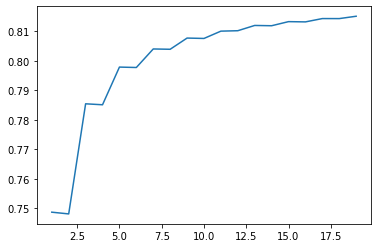

In [2]:
from matplotlib import pyplot as plt
import numpy as np

def train_grid_search(X, y):
    grid_searcher = GridSearchCV(KNeighborsClassifier(),
                                 param_grid={'n_neighbors': range(1, 20)})
    grid_searcher.fit(X, y)
    
    return grid_searcher.cv_results_['mean_test_score']
    

mean_test_scores = []
for i in range(1000):
  X, y = make_moons(n_samples = 1000, noise = 0.5)
  mean_test_score = train_grid_search(X, y)
  mean_test_scores.append(mean_test_score)

mean_test_scores = np.array(mean_test_scores)
plt.plot(np.arange(1, 20), np.mean(mean_test_scores, axis = 0))
#Graph:

# Задание 3

In [21]:
!pip install python-mnist
!mkdir dir_with_mnist_data_files
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
!mv train-images-idx3-ubyte.gz dir_with_mnist_data_files
!mv train-labels-idx1-ubyte.gz dir_with_mnist_data_files

  Running setup.py install for python-mnist: started
    Running setup.py install for python-mnist: finished with status 'done'


"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"mv" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"mv" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [1]:
from mnist import MNIST
from matplotlib import pyplot as plt
import numpy as np
mndata = MNIST('./', gz=True)
images, labels = mndata.load_training()
images, labels = np.array(images), np.array(labels)

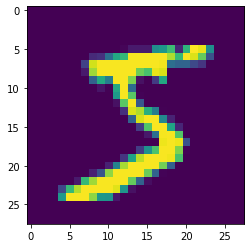

In [2]:
plt.imshow(images[0].reshape(28, 28))
#IMAGE:

В этом задании вы будете работать с классическим датасетом MNIST. Код выше загрузит данные в переменные images и labels. Обучите knn с 30 ближайшими соседями. Предварительно разбейте выборку на train и test в соотношении 80/20. Какой accuracy вы получаете на тестовой выборке?

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)

accuracy_score(y_test, knn.predict(X_test))
#Result:

0.95175

# Задание 4 (неоцениваемое)

Найдите примеры, которые были классифицированы не правильно. Найдите и визуализируйте 5 соседей неправильных предсказаний у любого ошибочного примера. Найти соседей точки можно с помощью метода kneighbors.  Почему они были классифицированы неправильно?